In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os 
import math 
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder

from scipy.stats import boxcox

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
old = pd.read_csv("regression_data.csv")
old.head()

,7129300520,10/13/14,3,1,1180,5650,1.1,0,0.1,3.1,7,1180.1,0.2,1955,0.3,98178,47.5112,-122.257,1340,5650.1,221900
0,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
1,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
2,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
3,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
4,7237550310,5/12/14,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1230000


In [3]:
# 

In [4]:
reg = pd.read_csv("regression_data.csv", names = ["id", "date", "bedrooms", "bathrooms", "sqft_living", 
                                                 "sqft_lot", "floors", "waterfront", "view","condition",
                                                 "grade", "sqft_above", "sqft_basement", "yr_built", 
                                                 "yr_renovated", "zipcode","lat","long","sqft_living15",
                                                 "sqft_lot15", "price"], header = None)
reg.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [5]:
reg.shape

(21597, 21)

In [6]:
reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [7]:
reg.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [8]:
reg = reg.drop(["id","lat","long"], axis=1)
reg.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900
1,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000
2,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000
3,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000
4,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000


In [9]:
reg["date"] = pd.to_datetime(reg["date"], format='%m/%d/%y')

In [10]:
reg.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000


In [11]:
reg['year'] = reg['date'].dt.year
reg['month'] = reg['date'].dt.month
reg['day'] = reg['date'].dt.day
reg.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000,2014,12,9
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000,2015,2,25
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000,2014,12,9
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000,2015,2,18


In [12]:
reg = reg.drop(["date"], axis=1)
reg.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000,2014,12,9
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000,2015,2,25
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000,2014,12,9
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000,2015,2,18


In [13]:
reg.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day
count,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000
mean,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,1986.620318,12758.283512,5.402966e+05,2014.322962,6.573969,15.687457
std,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,685.230472,27274.441950,3.673681e+05,0.467619,3.115061,8.634890
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000,7.800000e+04,2014.000000,1.000000,1.000000
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000,3.220000e+05,2014.000000,4.000000,8.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000,4.500000e+05,2014.000000,6.000000,16.000000
75%,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000,6.450000e+05,2015.000000,9.000000,23.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000,7.700000e+06,2015.000000,12.000000,31.000000


In [14]:
num_cols = reg.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    reg[col], _ = boxcox(reg[col] + 1)


In [15]:
# fazer bucketing 1, 2-3 , 4-5,  >= 6
reg["bedrooms"].value_counts()


1.727996    9824
2.081483    6882
1.306585    2760
2.388830    1601
2.662452     272
0.772417     196
2.910169      38
3.137261      13
3.347479       6
3.543590       3
3.727706       1
6.359294       1
Name: bedrooms, dtype: int64

In [16]:
def group_bedroom(val):
    if val in [1]:
        return 0
    elif val in [2, 3]:
        return 1
    elif val in [4,5]:
        return 2
    else:
        return 3

In [17]:
reg['bedroom_group'] = reg['bedrooms'].apply(group_bedroom)
reg.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,bedroom_group
0,1.727996,0.782255,7.644026,4.200988,0.434315,0.0,0.0,0.798314,1.230928,3.392032,0.000000,3.092516e+55,0.000000,0.000959,3.498369,4.046360,4.003714,0.000539,6.684962,8.161902,3
1,1.727996,1.451806,8.558253,4.246652,0.544276,0.0,0.0,0.798314,1.230928,3.494718,3.403234,2.985310e+55,0.321607,0.000959,3.540805,4.096056,4.047398,0.000539,7.750861,6.066939,3
2,1.306585,0.782255,7.149377,4.302832,0.434315,0.0,0.0,0.798314,1.187447,3.310577,0.000000,2.544762e+55,0.000000,0.000959,3.621017,4.104617,3.991987,0.000539,1.702386,13.682206,3
3,2.081483,1.773908,8.238215,4.177689,0.434315,0.0,0.0,0.898094,1.230928,3.370582,3.616269,3.376616e+55,0.000000,0.000959,3.501146,4.025332,4.052461,0.000539,7.750861,6.066939,3
4,1.727996,1.333623,8.056998,4.266108,0.434315,0.0,0.0,0.798314,1.266684,3.453405,0.000000,4.090497e+55,0.000000,0.000959,3.551948,4.093181,4.045013,0.000539,1.702386,10.571182,3


In [18]:
reg["bedroom_group"].value_counts()

3    21597
Name: bedroom_group, dtype: int64

In [19]:
reg["bathrooms"] = reg["bathrooms"].astype(int)
reg["floors"] = reg["floors"].astype(int)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,bedroom_group
0,1.727996,0,7.644026,4.200988,0,0.0,0.0,0.798314,1.230928,3.392032,0.0,3.092516e+55,0.0,0.000959,3.498369,4.04636,4.003714,0.000539,6.684962,8.161902,3


In [20]:
# bucketing 0-1 , 2-3, >3

reg["bathrooms"].value_counts()

1    17105
0     3935
2      553
3        4
Name: bathrooms, dtype: int64

In [21]:
def group_bathroom(val):
    if val in [0, 1]:
        return 0
    elif val in [2, 3]:
        return 1
    else:
        return 2


In [22]:
reg['bathroom_group'] = reg['bathrooms'].apply(group_bathroom)
reg.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,bedroom_group,bathroom_group
0,1.727996,0,7.644026,4.200988,0,0.0,0.0,0.798314,1.230928,3.392032,0.000000,3.092516e+55,0.000000,0.000959,3.498369,4.046360,4.003714,0.000539,6.684962,8.161902,3,0
1,1.727996,1,8.558253,4.246652,0,0.0,0.0,0.798314,1.230928,3.494718,3.403234,2.985310e+55,0.321607,0.000959,3.540805,4.096056,4.047398,0.000539,7.750861,6.066939,3,0
2,1.306585,0,7.149377,4.302832,0,0.0,0.0,0.798314,1.187447,3.310577,0.000000,2.544762e+55,0.000000,0.000959,3.621017,4.104617,3.991987,0.000539,1.702386,13.682206,3,0
3,2.081483,1,8.238215,4.177689,0,0.0,0.0,0.898094,1.230928,3.370582,3.616269,3.376616e+55,0.000000,0.000959,3.501146,4.025332,4.052461,0.000539,7.750861,6.066939,3,0
4,1.727996,1,8.056998,4.266108,0,0.0,0.0,0.798314,1.266684,3.453405,0.000000,4.090497e+55,0.000000,0.000959,3.551948,4.093181,4.045013,0.000539,1.702386,10.571182,3,0


In [23]:
# sqft of the house , transform in square meter
reg["sqft_living"].value_counts()

7.756916     138
7.843463     135
7.876400     133
8.138028     129
8.042945     129
            ... 
8.528859       1
10.178489      1
9.485410       1
8.238815       1
7.864155       1
Name: sqft_living, Length: 1034, dtype: int64

In [24]:
reg['sqm2_living'] = round(reg['sqft_living'] / 10.764, 1)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,bedroom_group,bathroom_group,sqm2_living
0,1.727996,0,7.644026,4.200988,0,0.0,0.0,0.798314,1.230928,3.392032,0.0,3.092516e+55,0.0,0.000959,3.498369,4.04636,4.003714,0.000539,6.684962,8.161902,3,0,0.7


In [25]:
# sqft of the lot
reg["sqft_lot"].value_counts()

4.177689    358
4.212245    290
4.133707    251
4.245607    220
4.169784    119
           ... 
4.430159      1
4.445930      1
4.301714      1
4.287564      1
3.832837      1
Name: sqft_lot, Length: 9776, dtype: int64

In [26]:
reg['sqm2_lot'] = round(reg['sqft_lot'] / 10.764, 1)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,bedroom_group,bathroom_group,sqm2_living,sqm2_lot
0,1.727996,0,7.644026,4.200988,0,0.0,0.0,0.798314,1.230928,3.392032,0.0,3.092516e+55,0.0,0.000959,3.498369,4.04636,4.003714,0.000539,6.684962,8.161902,3,0,0.7,0.4


In [27]:
reg["floors"].value_counts()

0    21597
Name: floors, dtype: int64

In [28]:
reg["waterfront"].value_counts()

0.000000    21434
0.005231      163
Name: waterfront, dtype: int64

In [29]:
# views 
reg["view"].value_counts()

0.000000    19475
0.116362      961
0.116371      510
0.116070      332
0.116371      319
Name: view, dtype: int64

In [30]:
# bucket in viewed or not viewed

def viewed_or_not(val):
    if val == 0:
        return 0
    else:
        return 1

In [31]:
reg['viewed_or_not'] = reg['view'].apply(viewed_or_not)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not
0,1.727996,0,7.644026,4.200988,0,0.0,0.0,0.798314,1.230928,3.392032,0.0,3.092516e+55,0.0,0.000959,3.498369,4.04636,4.003714,0.000539,6.684962,8.161902,3,0,0.7,0.4,0


In [32]:
reg["viewed_or_not"].value_counts()

0    19475
1     2122
Name: viewed_or_not, dtype: int64

In [33]:
reg["condition"].value_counts()

0.798314    14020
0.857623     5677
0.898094     1701
0.702339      170
0.517977       29
Name: condition, dtype: int64

In [34]:
reg["grade"].value_counts()

1.230928    8974
1.266684    6065
1.296739    2615
1.187447    2038
1.322447    1134
1.344753     399
1.133055     242
1.364338      89
1.062388      27
1.381709      13
0.965528       1
Name: grade, dtype: int64

In [35]:
reg["sqft_above"].value_counts()
#sqft apart from basement

3.409379    212
3.363310    210
3.395072    206
3.398049    192
3.385757    184
           ... 
3.572114      1
3.542463      1
3.509144      1
3.641635      1
3.425454      1
Name: sqft_above, Length: 942, dtype: int64

In [36]:
reg['sqm2_above'] = round(reg['sqft_above'] / 10.764, 1)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above
0,1.727996,0,7.644026,4.200988,0,0.0,0.0,0.798314,1.230928,3.392032,0.0,3.092516e+55,0.0,0.000959,3.498369,4.04636,4.003714,0.000539,6.684962,8.161902,3,0,0.7,0.4,0,0.3


In [37]:
reg["sqft_basement"].value_counts()
# sqftge basement

0.000000    13110
3.512887      221
3.552202      218
3.464725      214
3.585249      206
            ...  
3.474211        1
3.384148        1
3.580308        1
3.615223        1
3.261523        1
Name: sqft_basement, Length: 306, dtype: int64

In [38]:
reg['sqm2_basement'] = round(reg['sqft_basement'] / 10.764, 1)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement
0,1.727996,0,7.644026,4.200988,0,0.0,0.0,0.798314,1.230928,3.392032,0.0,3.092516e+55,0.0,0.000959,3.498369,4.04636,4.003714,0.000539,6.684962,8.161902,3,0,0.7,0.4,0,0.3,0.0


In [39]:
reg["yr_built"].value_counts()
# 0-30 , 30-60, 60-90 , > 90 , categorica ordinal!!

5.161195e+55    559
4.819187e+55    453
4.777969e+55    450
4.737084e+55    433
4.696528e+55    420
               ... 
2.544762e+55     30
1.908812e+55     29
1.926182e+55     27
2.590500e+55     24
2.567535e+55     21
Name: yr_built, Length: 116, dtype: int64

In [40]:
reg["age"] = 2023 - reg["yr_built"]
reg["age"].value_counts()

-5.161195e+55    559
-4.819187e+55    453
-4.777969e+55    450
-4.737084e+55    433
-4.696528e+55    420
                ... 
-2.544762e+55     30
-1.908812e+55     29
-1.926182e+55     27
-2.590500e+55     24
-2.567535e+55     21
Name: age, Length: 116, dtype: int64

In [41]:
def group_year(val):
    if val in [0, 30]:
        return 0
    elif val in [31, 60]:
        return 1
    elif val in [61, 90]:
        return 2
    else:
        return 3

In [42]:
reg['age_group'] = reg['age'].apply(group_year)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,age_group
0,1.727996,0,7.644026,4.200988,0,0.0,0.0,0.798314,1.230928,3.392032,0.0,3.092516e+55,0.0,0.000959,3.498369,4.04636,4.003714,0.000539,6.684962,8.161902,3,0,0.7,0.4,0,0.3,0.0,-3.092516e+55,3


In [43]:
reg["yr_renovated"].value_counts()
# renovaçao sim/não

0.000000    20683
0.321607       91
0.321607       37
0.321607       36
0.321607       35
            ...  
0.321607        1
0.321607        1
0.321607        1
0.321607        1
0.321607        1
Name: yr_renovated, Length: 70, dtype: int64

In [44]:
# group - renovated or not

def ren_or_not(val):
    if val == 0:
        return 0
    else:
        return 1

In [45]:
reg['ren_or_not'] = reg['yr_renovated'].apply(ren_or_not)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,age_group,ren_or_not
0,1.727996,0,7.644026,4.200988,0,0.0,0.0,0.798314,1.230928,3.392032,0.0,3.092516e+55,0.0,0.000959,3.498369,4.04636,4.003714,0.000539,6.684962,8.161902,3,0,0.7,0.4,0,0.3,0.0,-3.092516e+55,3,0


In [46]:
reg["zipcode"].value_counts()
# ver os zipcodes - ricos  ---> ver mais a frente

0.000959    21597
Name: zipcode, dtype: int64

In [47]:
reg["sqft_living15"].value_counts()
# Living room area in 2015(implies-- some renovations) 
# This might or might not have affected the lotsize area

3.524081    197
3.511775    195
3.526424    192
3.519280    180
3.514319    169
           ... 
3.669802      1
3.710150      1
3.621485      1
3.704104      1
3.632612      1
Name: sqft_living15, Length: 777, dtype: int64

In [48]:
reg['sqm2_living15'] = round(reg['sqft_living15'] / 10.764, 1)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,age_group,ren_or_not,sqm2_living15
0,1.727996,0,7.644026,4.200988,0,0.0,0.0,0.798314,1.230928,3.392032,0.0,3.092516e+55,0.0,0.000959,3.498369,4.04636,4.003714,0.000539,6.684962,8.161902,3,0,0.7,0.4,0,0.3,0.0,-3.092516e+55,3,0,0.3


In [49]:
reg["sqft_lot15"].value_counts()
# lotSize area in 2015(implies-- some renovations)

4.025332    427
3.985553    356
4.056510    288
4.086544    210
4.018190    145
           ... 
4.140450      1
4.146281      1
4.158438      1
3.779719      1
3.850468      1
Name: sqft_lot15, Length: 8682, dtype: int64

In [50]:
reg['sqm2_lot15'] = round(reg['sqft_lot15'] / 10.764, 1)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,age_group,ren_or_not,sqm2_living15,sqm2_lot15
0,1.727996,0,7.644026,4.200988,0,0.0,0.0,0.798314,1.230928,3.392032,0.0,3.092516e+55,0.0,0.000959,3.498369,4.04636,4.003714,0.000539,6.684962,8.161902,3,0,0.7,0.4,0,0.3,0.0,-3.092516e+55,3,0,0.3,0.4


In [51]:
reg["price"].value_counts()

4.039308    172
4.027331    172
4.048374    159
4.044122    152
4.036646    150
           ... 
4.015861      1
4.038254      1
4.028012      1
4.070667      1
4.034032      1
Name: price, Length: 3622, dtype: int64

In [52]:
def price_category(val):
    if val >= 0 and val <= 325000:
        return 0 
    elif val >= 325001 and val <= 649999:
        return 1    
    elif val >= 650000 and val <= 974999:
        return 2
    elif val >= 975000 and val <= 1299999:
        return 3
    else:
        return 4


In [53]:
reg['price_cat'] = reg['price'].apply(price_category)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,age_group,ren_or_not,sqm2_living15,sqm2_lot15,price_cat
0,1.727996,0,7.644026,4.200988,0,0.0,0.0,0.798314,1.230928,3.392032,0.0,3.092516e+55,0.0,0.000959,3.498369,4.04636,4.003714,0.000539,6.684962,8.161902,3,0,0.7,0.4,0,0.3,0.0,-3.092516e+55,3,0,0.3,0.4,0


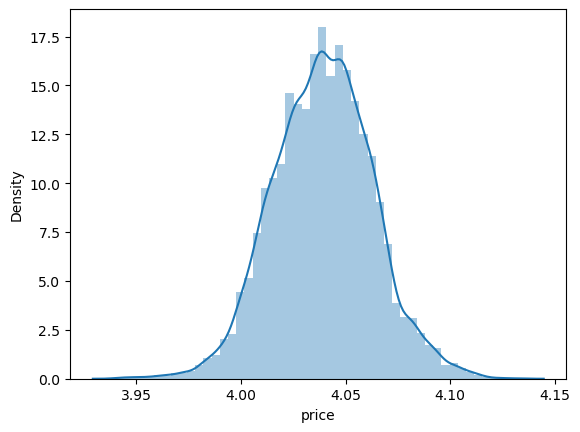

In [54]:
sns.distplot(reg["price"])
plt.show()

In [55]:
reg["price_cat"].value_counts()

0    21597
Name: price_cat, dtype: int64

In [56]:
# houses sold in 2014 e 2015 --> only two , drop them
reg["year"].value_counts()

0.000539    21597
Name: year, dtype: int64

In [57]:
reg = reg.drop(["year"], axis=1)
reg.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,month,day,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,age_group,ren_or_not,sqm2_living15,sqm2_lot15,price_cat
0,1.727996,0,7.644026,4.200988,0,0.0,0.0,0.798314,1.230928,3.392032,0.000000,3.092516e+55,0.000000,0.000959,3.498369,4.046360,4.003714,6.684962,8.161902,3,0,0.7,0.4,0,0.3,0.0,-3.092516e+55,3,0,0.3,0.4,0
1,1.727996,1,8.558253,4.246652,0,0.0,0.0,0.798314,1.230928,3.494718,3.403234,2.985310e+55,0.321607,0.000959,3.540805,4.096056,4.047398,7.750861,6.066939,3,0,0.8,0.4,0,0.3,0.3,-2.985310e+55,3,1,0.3,0.4,0
2,1.306585,0,7.149377,4.302832,0,0.0,0.0,0.798314,1.187447,3.310577,0.000000,2.544762e+55,0.000000,0.000959,3.621017,4.104617,3.991987,1.702386,13.682206,3,0,0.7,0.4,0,0.3,0.0,-2.544762e+55,3,0,0.3,0.4,0
3,2.081483,1,8.238215,4.177689,0,0.0,0.0,0.898094,1.230928,3.370582,3.616269,3.376616e+55,0.000000,0.000959,3.501146,4.025332,4.052461,7.750861,6.066939,3,0,0.8,0.4,0,0.3,0.3,-3.376616e+55,3,0,0.3,0.4,0
4,1.727996,1,8.056998,4.266108,0,0.0,0.0,0.798314,1.266684,3.453405,0.000000,4.090497e+55,0.000000,0.000959,3.551948,4.093181,4.045013,1.702386,10.571182,3,0,0.7,0.4,0,0.3,0.0,-4.090497e+55,3,0,0.3,0.4,0


In [58]:
reg["month"].value_counts()
# Q1-4

3.764194    2414
3.114699    2229
4.986971    2211
4.386691    2178
5.568480    1939
6.684962    1876
2.431173    1875
6.133807    1771
7.750861    1470
7.223546    1409
1.702386    1247
0.907891     978
Name: month, dtype: int64

In [59]:
def quarter(val):
      if val >= 1 and val <= 3:
        return 1 
      if val >= 4  and val <=6:
        return 2    
      if val >= 7 and val <= 9:
        return 3
      else:
        return 4

In [60]:
reg["quarter"] = reg["month"].apply(quarter)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,month,day,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,age_group,ren_or_not,sqm2_living15,sqm2_lot15,price_cat,quarter
0,1.727996,0,7.644026,4.200988,0,0.0,0.0,0.798314,1.230928,3.392032,0.0,3.092516e+55,0.0,0.000959,3.498369,4.04636,4.003714,6.684962,8.161902,3,0,0.7,0.4,0,0.3,0.0,-3.092516e+55,3,0,0.3,0.4,0,4


In [61]:
reg["day"].value_counts()
# dividir em quinzenas

12.818522    905
6.066939     808
3.733639     805
13.252618    800
11.486684    787
9.630136     759
10.104071    746
14.528710    745
12.379681    742
8.161902     740
5.511055     740
13.682206    739
1.694464     736
6.608481     732
4.347482     719
7.654753     718
10.571182    715
7.137311     700
2.416477     682
3.092368     678
14.107503    669
11.935831    658
15.359571    657
8.659679     655
4.938782     650
11.031920    646
9.148866     623
14.946009    612
15.769550    611
0.905339     569
16.176093    251
Name: day, dtype: int64

In [62]:
def quinzena(day):
     if day >= 1 and day <= 14:
        return 1 
     else:
        return 2

In [63]:
reg["fortnight"] = reg["day"].apply(quinzena)

In [64]:
reg["fortnight"].value_counts()

1    17483
2     4114
Name: fortnight, dtype: int64

In [65]:
reg.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,month,day,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,age_group,ren_or_not,sqm2_living15,sqm2_lot15,price_cat,quarter,fortnight
0,1.727996,0,7.644026,4.200988,0,0.0,0.0,0.798314,1.230928,3.392032,0.000000,3.092516e+55,0.000000,0.000959,3.498369,4.046360,4.003714,6.684962,8.161902,3,0,0.7,0.4,0,0.3,0.0,-3.092516e+55,3,0,0.3,0.4,0,4,1
1,1.727996,1,8.558253,4.246652,0,0.0,0.0,0.798314,1.230928,3.494718,3.403234,2.985310e+55,0.321607,0.000959,3.540805,4.096056,4.047398,7.750861,6.066939,3,0,0.8,0.4,0,0.3,0.3,-2.985310e+55,3,1,0.3,0.4,0,3,1
2,1.306585,0,7.149377,4.302832,0,0.0,0.0,0.798314,1.187447,3.310577,0.000000,2.544762e+55,0.000000,0.000959,3.621017,4.104617,3.991987,1.702386,13.682206,3,0,0.7,0.4,0,0.3,0.0,-2.544762e+55,3,0,0.3,0.4,0,1,1
3,2.081483,1,8.238215,4.177689,0,0.0,0.0,0.898094,1.230928,3.370582,3.616269,3.376616e+55,0.000000,0.000959,3.501146,4.025332,4.052461,7.750861,6.066939,3,0,0.8,0.4,0,0.3,0.3,-3.376616e+55,3,0,0.3,0.4,0,3,1
4,1.727996,1,8.056998,4.266108,0,0.0,0.0,0.798314,1.266684,3.453405,0.000000,4.090497e+55,0.000000,0.000959,3.551948,4.093181,4.045013,1.702386,10.571182,3,0,0.7,0.4,0,0.3,0.0,-4.090497e+55,3,0,0.3,0.4,0,1,1


In [66]:
reg_model = reg.copy()

In [67]:
reg_model.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,month,day,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,age_group,ren_or_not,sqm2_living15,sqm2_lot15,price_cat,quarter,fortnight
0,1.727996,0,7.644026,4.200988,0,0.0,0.0,0.798314,1.230928,3.392032,0.000000,3.092516e+55,0.000000,0.000959,3.498369,4.046360,4.003714,6.684962,8.161902,3,0,0.7,0.4,0,0.3,0.0,-3.092516e+55,3,0,0.3,0.4,0,4,1
1,1.727996,1,8.558253,4.246652,0,0.0,0.0,0.798314,1.230928,3.494718,3.403234,2.985310e+55,0.321607,0.000959,3.540805,4.096056,4.047398,7.750861,6.066939,3,0,0.8,0.4,0,0.3,0.3,-2.985310e+55,3,1,0.3,0.4,0,3,1
2,1.306585,0,7.149377,4.302832,0,0.0,0.0,0.798314,1.187447,3.310577,0.000000,2.544762e+55,0.000000,0.000959,3.621017,4.104617,3.991987,1.702386,13.682206,3,0,0.7,0.4,0,0.3,0.0,-2.544762e+55,3,0,0.3,0.4,0,1,1
3,2.081483,1,8.238215,4.177689,0,0.0,0.0,0.898094,1.230928,3.370582,3.616269,3.376616e+55,0.000000,0.000959,3.501146,4.025332,4.052461,7.750861,6.066939,3,0,0.8,0.4,0,0.3,0.3,-3.376616e+55,3,0,0.3,0.4,0,3,1
4,1.727996,1,8.056998,4.266108,0,0.0,0.0,0.798314,1.266684,3.453405,0.000000,4.090497e+55,0.000000,0.000959,3.551948,4.093181,4.045013,1.702386,10.571182,3,0,0.7,0.4,0,0.3,0.0,-4.090497e+55,3,0,0.3,0.4,0,1,1


In [68]:
reg_model.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'price', 'month', 'day', 'bedroom_group',
       'bathroom_group', 'sqm2_living', 'sqm2_lot', 'viewed_or_not',
       'sqm2_above', 'sqm2_basement', 'age', 'age_group', 'ren_or_not',
       'sqm2_living15', 'sqm2_lot15', 'price_cat', 'quarter', 'fortnight'],
      dtype='object')

In [69]:
reg_model = reg_model.drop(["bedrooms", "bathrooms","view","sqft_living", "sqft_lot", "sqft_above",
                            "sqft_basement", "yr_built", "yr_renovated", "zipcode", "sqft_living15", 
                            "sqft_lot15", "month", "day", "age", "price_cat"], axis = 1)
reg_model.head()

,floors,waterfront,condition,grade,price,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age_group,ren_or_not,sqm2_living15,sqm2_lot15,quarter,fortnight
0,0,0.0,0.798314,1.230928,4.003714,3,0,0.7,0.4,0,0.3,0.0,3,0,0.3,0.4,4,1
1,0,0.0,0.798314,1.230928,4.047398,3,0,0.8,0.4,0,0.3,0.3,3,1,0.3,0.4,3,1
2,0,0.0,0.798314,1.187447,3.991987,3,0,0.7,0.4,0,0.3,0.0,3,0,0.3,0.4,1,1
3,0,0.0,0.898094,1.230928,4.052461,3,0,0.8,0.4,0,0.3,0.3,3,0,0.3,0.4,3,1
4,0,0.0,0.798314,1.266684,4.045013,3,0,0.7,0.4,0,0.3,0.0,3,0,0.3,0.4,1,1


In [70]:
reg_model["living_sqm15_init"] = reg["sqm2_living15"] - reg["sqm2_living"]
reg_model.head()

,floors,waterfront,condition,grade,price,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age_group,ren_or_not,sqm2_living15,sqm2_lot15,quarter,fortnight,living_sqm15_init
0,0,0.0,0.798314,1.230928,4.003714,3,0,0.7,0.4,0,0.3,0.0,3,0,0.3,0.4,4,1,-0.4
1,0,0.0,0.798314,1.230928,4.047398,3,0,0.8,0.4,0,0.3,0.3,3,1,0.3,0.4,3,1,-0.5
2,0,0.0,0.798314,1.187447,3.991987,3,0,0.7,0.4,0,0.3,0.0,3,0,0.3,0.4,1,1,-0.4
3,0,0.0,0.898094,1.230928,4.052461,3,0,0.8,0.4,0,0.3,0.3,3,0,0.3,0.4,3,1,-0.5
4,0,0.0,0.798314,1.266684,4.045013,3,0,0.7,0.4,0,0.3,0.0,3,0,0.3,0.4,1,1,-0.4


In [71]:
def bigger_living_or_not(val):
      if val <= 0:
        return 0  
      else:
        return 1

In [72]:
reg_model['bigger_living_or_not'] = reg_model["living_sqm15_init"].apply(bigger_living_or_not)
reg_model.head(1)

,floors,waterfront,condition,grade,price,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age_group,ren_or_not,sqm2_living15,sqm2_lot15,quarter,fortnight,living_sqm15_init,bigger_living_or_not
0,0,0.0,0.798314,1.230928,4.003714,3,0,0.7,0.4,0,0.3,0.0,3,0,0.3,0.4,4,1,-0.4,0


In [73]:
reg_model["bigger_living_or_not"].value_counts()

0    21597
Name: bigger_living_or_not, dtype: int64

In [74]:
reg_model["lot_sqm15_init"] = reg["sqm2_lot15"] - reg["sqm2_lot"]
reg_model.head()

,floors,waterfront,condition,grade,price,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age_group,ren_or_not,sqm2_living15,sqm2_lot15,quarter,fortnight,living_sqm15_init,bigger_living_or_not,lot_sqm15_init
0,0,0.0,0.798314,1.230928,4.003714,3,0,0.7,0.4,0,0.3,0.0,3,0,0.3,0.4,4,1,-0.4,0,0.0
1,0,0.0,0.798314,1.230928,4.047398,3,0,0.8,0.4,0,0.3,0.3,3,1,0.3,0.4,3,1,-0.5,0,0.0
2,0,0.0,0.798314,1.187447,3.991987,3,0,0.7,0.4,0,0.3,0.0,3,0,0.3,0.4,1,1,-0.4,0,0.0
3,0,0.0,0.898094,1.230928,4.052461,3,0,0.8,0.4,0,0.3,0.3,3,0,0.3,0.4,3,1,-0.5,0,0.0
4,0,0.0,0.798314,1.266684,4.045013,3,0,0.7,0.4,0,0.3,0.0,3,0,0.3,0.4,1,1,-0.4,0,0.0


In [75]:
def bigger_lot_or_not(val):
      if val <= 0:
        return 0  
      else:
        return 1

In [76]:
reg_model['bigger_lot_or_not'] = reg_model["lot_sqm15_init"].apply(bigger_lot_or_not)
reg_model.head()

,floors,waterfront,condition,grade,price,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age_group,ren_or_not,sqm2_living15,sqm2_lot15,quarter,fortnight,living_sqm15_init,bigger_living_or_not,lot_sqm15_init,bigger_lot_or_not
0,0,0.0,0.798314,1.230928,4.003714,3,0,0.7,0.4,0,0.3,0.0,3,0,0.3,0.4,4,1,-0.4,0,0.0,0
1,0,0.0,0.798314,1.230928,4.047398,3,0,0.8,0.4,0,0.3,0.3,3,1,0.3,0.4,3,1,-0.5,0,0.0,0
2,0,0.0,0.798314,1.187447,3.991987,3,0,0.7,0.4,0,0.3,0.0,3,0,0.3,0.4,1,1,-0.4,0,0.0,0
3,0,0.0,0.898094,1.230928,4.052461,3,0,0.8,0.4,0,0.3,0.3,3,0,0.3,0.4,3,1,-0.5,0,0.0,0
4,0,0.0,0.798314,1.266684,4.045013,3,0,0.7,0.4,0,0.3,0.0,3,0,0.3,0.4,1,1,-0.4,0,0.0,0


In [77]:
reg_model.columns

Index(['floors', 'waterfront', 'condition', 'grade', 'price', 'bedroom_group',
       'bathroom_group', 'sqm2_living', 'sqm2_lot', 'viewed_or_not',
       'sqm2_above', 'sqm2_basement', 'age_group', 'ren_or_not',
       'sqm2_living15', 'sqm2_lot15', 'quarter', 'fortnight',
       'living_sqm15_init', 'bigger_living_or_not', 'lot_sqm15_init',
       'bigger_lot_or_not'],
      dtype='object')

In [78]:
reg_model = reg_model.drop(["living_sqm15_init", "lot_sqm15_init"], axis = 1)
reg_model.head()

,floors,waterfront,condition,grade,price,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age_group,ren_or_not,sqm2_living15,sqm2_lot15,quarter,fortnight,bigger_living_or_not,bigger_lot_or_not
0,0,0.0,0.798314,1.230928,4.003714,3,0,0.7,0.4,0,0.3,0.0,3,0,0.3,0.4,4,1,0,0
1,0,0.0,0.798314,1.230928,4.047398,3,0,0.8,0.4,0,0.3,0.3,3,1,0.3,0.4,3,1,0,0
2,0,0.0,0.798314,1.187447,3.991987,3,0,0.7,0.4,0,0.3,0.0,3,0,0.3,0.4,1,1,0,0
3,0,0.0,0.898094,1.230928,4.052461,3,0,0.8,0.4,0,0.3,0.3,3,0,0.3,0.4,3,1,0,0
4,0,0.0,0.798314,1.266684,4.045013,3,0,0.7,0.4,0,0.3,0.0,3,0,0.3,0.4,1,1,0,0


In [79]:
target = reg_model["price"]

In [80]:
cat_model = reg_model[["floors", 'waterfront', 'condition', 'grade', "bedroom_group",
                       'bathroom_group', 'viewed_or_not','age_group', 'ren_or_not', 
                       'quarter', 'fortnight',"bigger_living_or_not", 'bigger_lot_or_not']]
cat_model.head()

,floors,waterfront,condition,grade,bedroom_group,bathroom_group,viewed_or_not,age_group,ren_or_not,quarter,fortnight,bigger_living_or_not,bigger_lot_or_not
0,0,0.0,0.798314,1.230928,3,0,0,3,0,4,1,0,0
1,0,0.0,0.798314,1.230928,3,0,0,3,1,3,1,0,0
2,0,0.0,0.798314,1.187447,3,0,0,3,0,1,1,0,0
3,0,0.0,0.898094,1.230928,3,0,0,3,0,3,1,0,0
4,0,0.0,0.798314,1.266684,3,0,0,3,0,1,1,0,0


In [81]:
num_model = reg_model[['sqm2_living', 'sqm2_lot', 'sqm2_above', 'sqm2_basement', 
                       'sqm2_living15', 'sqm2_lot15']]
num_model.head()  

,sqm2_living,sqm2_lot,sqm2_above,sqm2_basement,sqm2_living15,sqm2_lot15
0,0.7,0.4,0.3,0.0,0.3,0.4
1,0.8,0.4,0.3,0.3,0.3,0.4
2,0.7,0.4,0.3,0.0,0.3,0.4
3,0.8,0.4,0.3,0.3,0.3,0.4
4,0.7,0.4,0.3,0.0,0.3,0.4


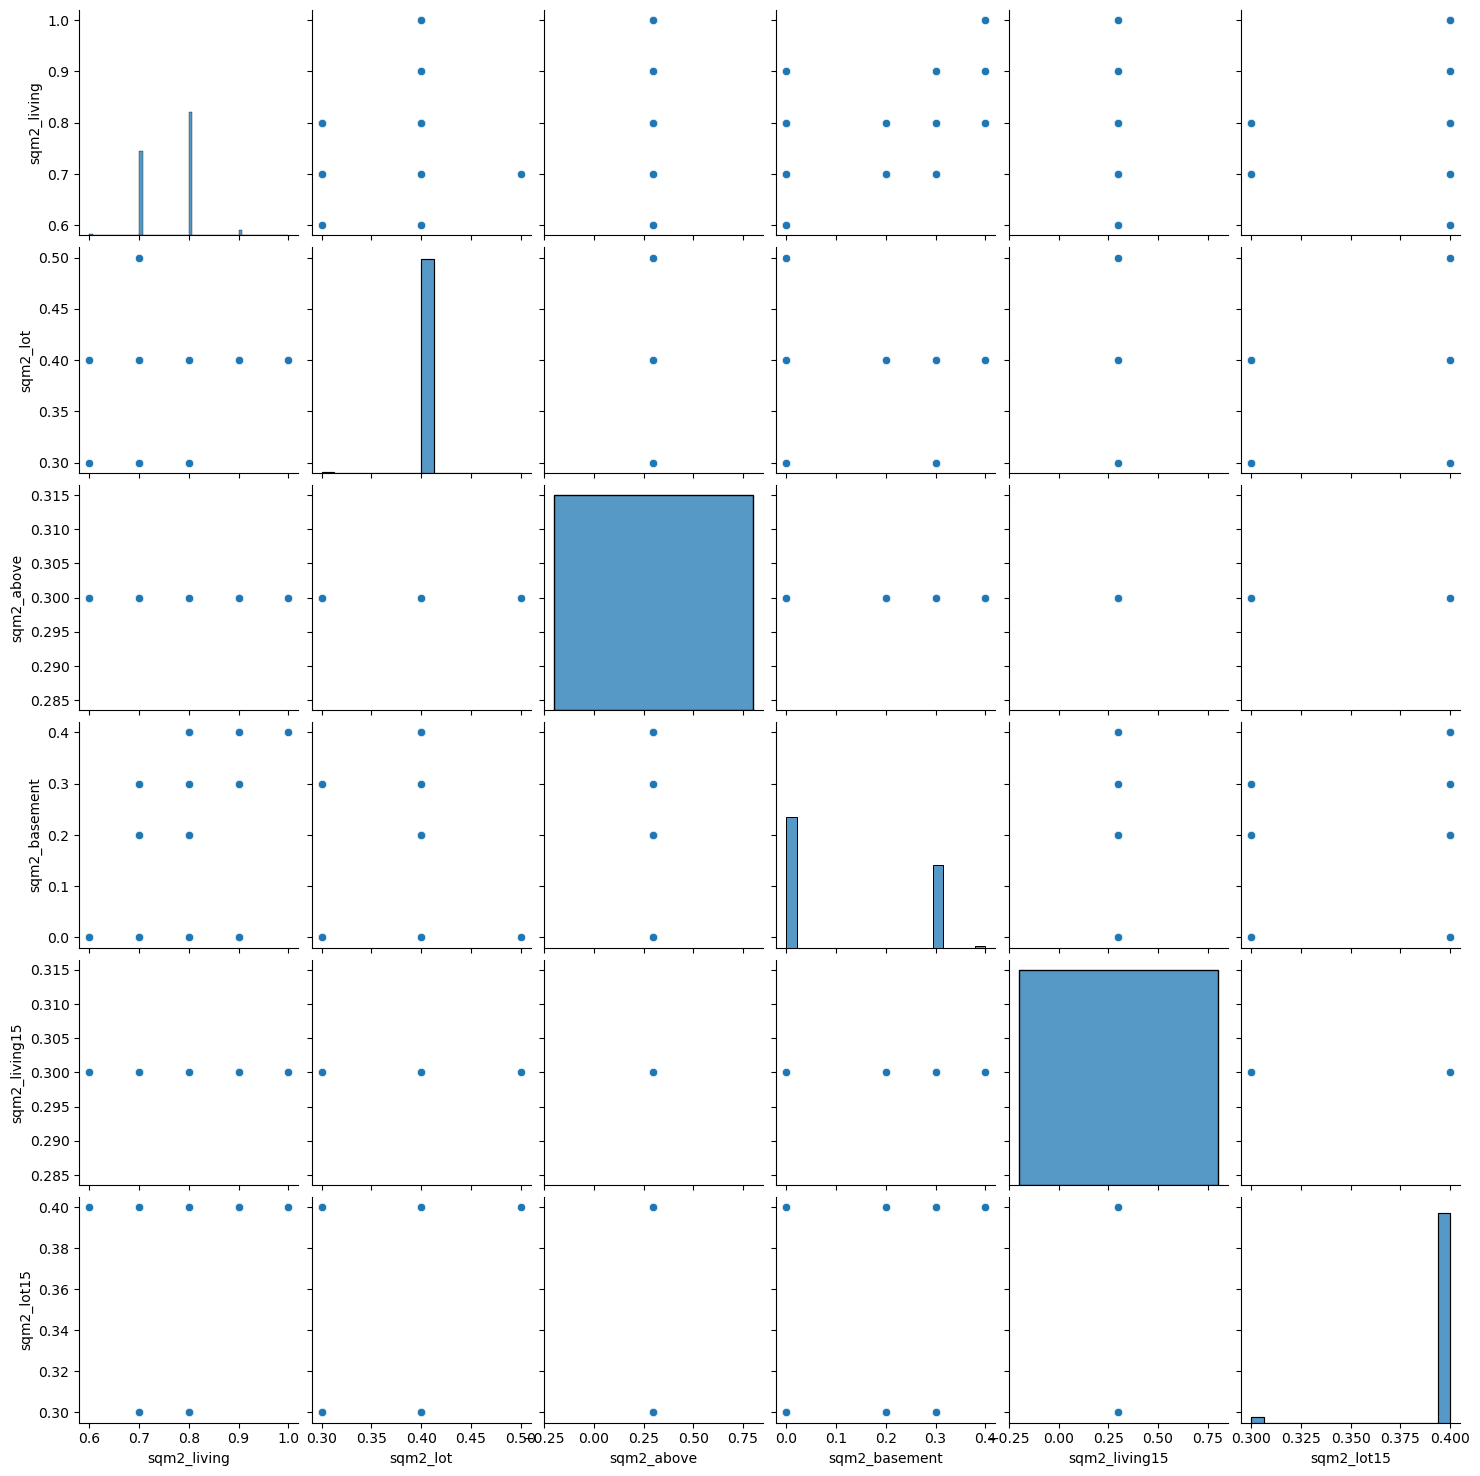

In [82]:
sns.pairplot(num_model)

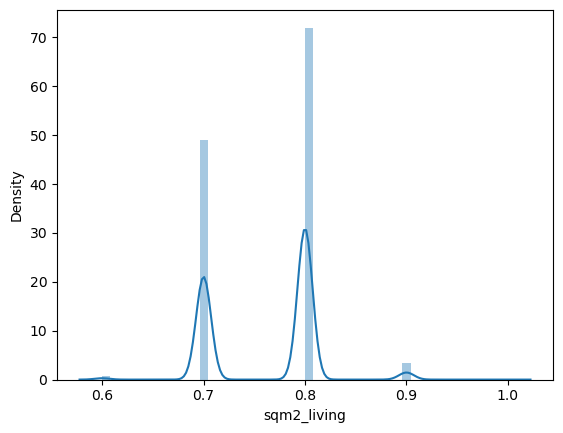

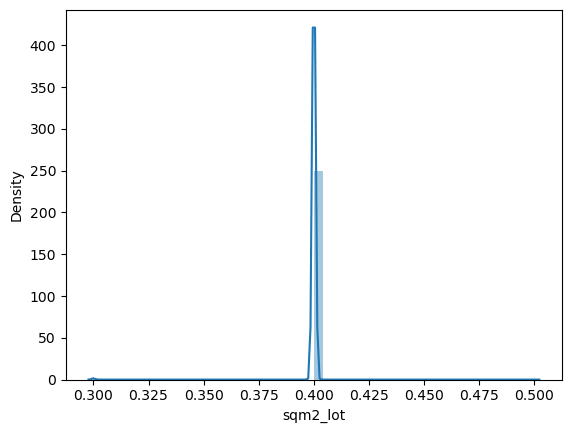

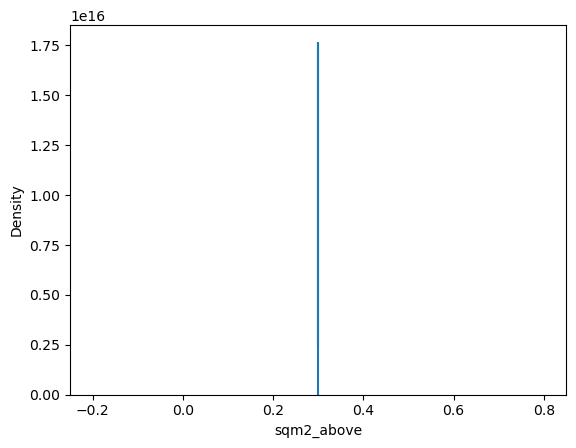

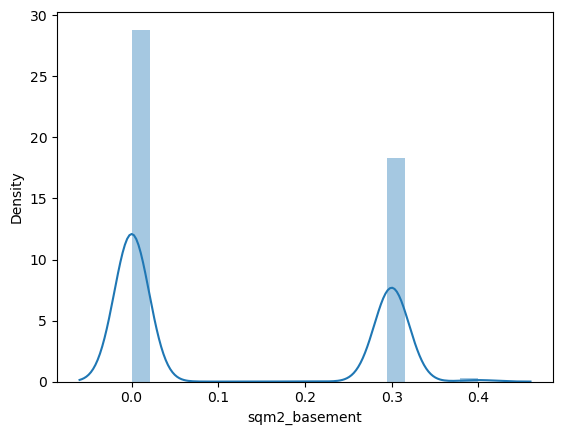

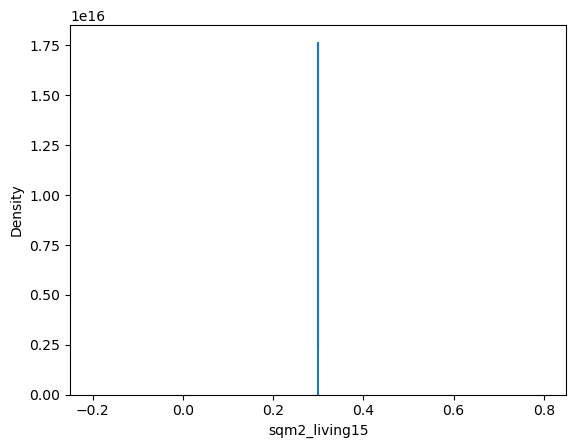

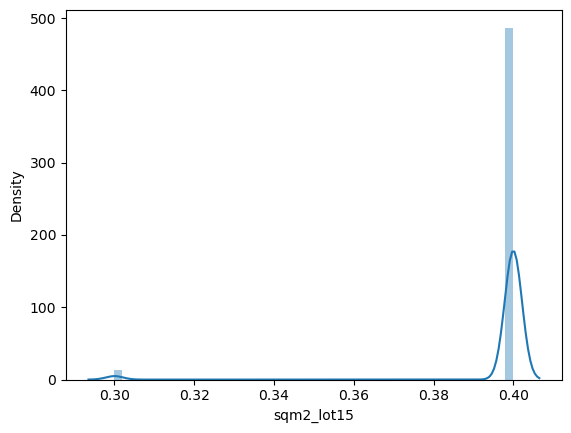

In [83]:
for column in num_model.columns:
    sns.distplot(num_model[column])
    plt.show()

In [84]:
num_model_corr = num_model.corr()
num_model_corr = round(num_model_corr,2)
num_model_corr

,sqm2_living,sqm2_lot,sqm2_above,sqm2_basement,sqm2_living15,sqm2_lot15
sqm2_living,1.00,0.06,NaN,0.24,NaN,0.16
sqm2_lot,0.06,1.00,NaN,-0.01,NaN,0.22
sqm2_above,NaN,NaN,NaN,NaN,NaN,NaN
sqm2_basement,0.24,-0.01,NaN,1.00,NaN,-0.03
sqm2_living15,NaN,NaN,NaN,NaN,NaN,NaN
sqm2_lot15,0.16,0.22,NaN,-0.03,NaN,1.00


<Figure size 1000x1000 with 0 Axes>

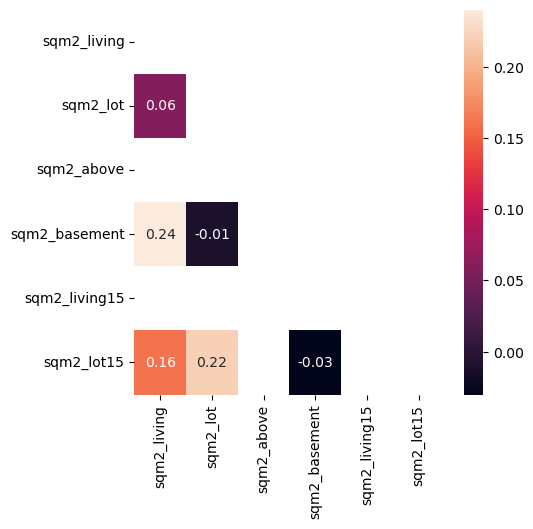

In [85]:
plt.figure(figsize=(10,10))

mask = np.zeros_like(num_model_corr)

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.heatmap(num_model_corr, mask=mask, annot=True)
plt.show()

In [86]:
X = num_model
y = target

In [87]:
transformer = MinMaxScaler().fit(X) 
x_minmax = transformer.transform(X) 
print(x_minmax.shape)

(21597, 6)


In [88]:
X_norm = pd.DataFrame(x_minmax,index = X.index, columns=X.columns)
X_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sqm2_living    21597 non-null  float64
 1   sqm2_lot       21597 non-null  float64
 2   sqm2_above     21597 non-null  float64
 3   sqm2_basement  21597 non-null  float64
 4   sqm2_living15  21597 non-null  float64
 5   sqm2_lot15     21597 non-null  float64
dtypes: float64(6)
memory usage: 1012.5 KB


In [89]:
X_norm.head()

,sqm2_living,sqm2_lot,sqm2_above,sqm2_basement,sqm2_living15,sqm2_lot15
0,0.25,0.5,0.0,0.00,0.0,1.0
1,0.50,0.5,0.0,0.75,0.0,1.0
2,0.25,0.5,0.0,0.00,0.0,1.0
3,0.50,0.5,0.0,0.75,0.0,1.0
4,0.25,0.5,0.0,0.00,0.0,1.0


In [90]:
model_conc = pd.concat([X_norm, cat_model], axis = 1)
model_conc.sample(50)

,sqm2_living,sqm2_lot,sqm2_above,sqm2_basement,sqm2_living15,sqm2_lot15,floors,waterfront,condition,grade,bedroom_group,bathroom_group,viewed_or_not,age_group,ren_or_not,quarter,fortnight,bigger_living_or_not,bigger_lot_or_not
4379,0.25,0.5,0.0,0.00,0.0,1.0,0,0.0,0.702339,1.133055,3,0,0,3,0,4,1,0,0
2484,0.50,0.5,0.0,0.00,0.0,1.0,0,0.0,0.798314,1.296739,3,0,0,3,0,2,1,0,0
15987,0.50,0.5,0.0,0.75,0.0,1.0,0,0.0,0.798314,1.230928,3,0,0,3,0,1,1,0,0
2216,0.25,0.5,0.0,0.00,0.0,1.0,0,0.0,0.898094,1.230928,3,0,0,3,0,4,1,0,0
1731,0.50,0.5,0.0,0.75,0.0,1.0,0,0.0,0.898094,1.230928,3,0,0,3,0,4,2,0,0
6364,0.25,0.5,0.0,0.00,0.0,1.0,0,0.0,0.798314,1.187447,3,0,0,3,0,4,2,0,0
15272,0.50,0.5,0.0,0.75,0.0,1.0,0,0.0,0.798314,1.296739,3,1,1,3,0,1,1,0,0
21122,0.50,0.5,0.0,0.00,0.0,1.0,0,0.0,0.798314,1.296739,3,0,0,3,0,3,1,0,0
8612,0.50,0.5,0.0,0.75,0.0,1.0,0,0.0,0.798314,1.266684,3,0,1,3,0,4,1,0,0
13206,0.50,0.5,0.0,0.75,0.0,1.0,0,0.0,0.857623,1.266684,3,0,0,3,0,3,2,0,0


In [91]:
len(model_conc)

21597

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [93]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [94]:
pred = model.predict(X_test)
pred.shape

(6480,)

In [95]:
R2 = r2_score(y_test, pred)
adj_r2 = (1 - (1 - R2) * ((X.shape[0] - 1) / (X.shape[0] - X.shape[1] - 1)))
RMSE = mean_squared_error(y_test, pred, squared=False)
MSE = mean_squared_error(y_test, pred)
print("r2 = ", R2)
print("adjusted r2 = ", adj_r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

r2 =  0.30062967471796376
adjusted r2 =  0.3004353152019058
RMSE =  0.019846065429926413
MSE =  0.0003938663130489203


In [96]:
results = pd.DataFrame()
results['true'] = y_test
results['pred'] = pred
results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,diff
3879,4.051442,4.027218,0.024224
12341,4.015149,4.022449,0.007299
5329,4.053930,4.050778,0.003151
19235,4.012215,4.022449,0.010233
14722,4.018767,4.022449,0.003682
...,...,...,...
4483,4.025903,4.046009,0.020106
9625,4.017892,4.022449,0.004557
19736,4.049939,4.046009,0.003930
96,4.009606,4.046009,0.036403


In [97]:
results.sort_values('diff', ascending=False).head(10)

,true,pred,diff
15279,3.938891,4.022449,0.083558
13743,3.946041,4.022449,0.076408
5860,3.947980,4.022449,0.074469
12539,3.948736,4.022449,0.073712
14567,3.952371,4.022449,0.070078
5298,3.955112,4.022449,0.067337
15442,3.955775,4.022449,0.066673
20946,3.961994,4.022449,0.060455
14723,3.961994,4.022449,0.060455
3536,3.990364,4.050778,0.060414


<AxesSubplot:xlabel='true', ylabel='pred'>

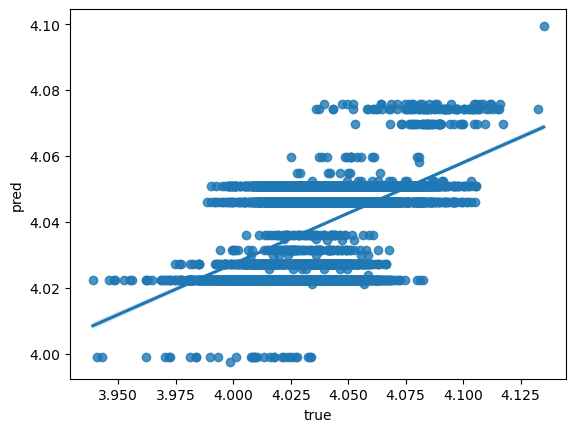

In [98]:
sns.regplot(results['true'], results['pred'])